# 事件相关字段

事件相关领域（ERF）以及事件相关电位（ERP，即任务态）是由给定事件引发的神经元活动产生的。它们通常用于认知和临床神经科学中，以量化与给定任务相关的大脑活动（Luck 2014，Woodman 2010）。本节的目的是根据视觉输入生成事件相关领域（ERF），并对时间过程和地形进行一些简单的绘制。事件相关领域是由与给定事件相锁定的神经元活动生成的。

## Preparation
Import the relevant modules.

In [2]:
import os.path as op
import os

import mne
from mne_bids import BIDSPath, read_raw_bids 

### File overview
The chapter relies on the input file (embedded in the BIDS structure):
~~~
<BIDS_ROOT>/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-12_epo.fif
~~~


See the local paths of the data:

### 加载数据

In [3]:
subject = '01'
session = '01'
task = 'SpAtt'  # name of the task
run = '02'  # both runs compbined 
meg_suffix = 'meg'
epo_suffix = 'epo'

deriv_root = '/home/ubuntu/database/ds004346-FLUX/derivatives/analysis'

bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root, extension='.fif', check=False)
print(bids_path.basename,bids_path.fpath)

sub-01_ses-01_task-SpAtt_run-02_epo.fif /home/ubuntu/database/ds004346-FLUX/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_epo.fif


Read the epochs:

In [4]:
epochs = mne.read_epochs(bids_path.fpath,
                         proj = False,
                         preload=True,
                         verbose=True)

Reading /home/ubuntu/database/ds004346-FLUX/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_epo.fif ...


    Found the data of interest:
        t =   -2500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
136 matching events found
No baseline correction applied


## 平均化试次数据
确定左侧条件相对于移动光栅开始的时间，然后在试验中求平均值。随后，在30 Hz处应用低通滤波器，并将数据裁剪到刺激开始后-100至400 ms的时间间隔内。30Hz低通滤波器通常用于认知型事件相关反应。


In [5]:
evoked_left= epochs['cue_left'].copy().average(method='mean').filter(0.0, 30).crop(-0.1,0.4)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s


## 绘制事件相关字段

要绘制单个磁力计的单个试次和平均事件相关场，请编写：

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    0.8s
[Parallel(n_job

Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated


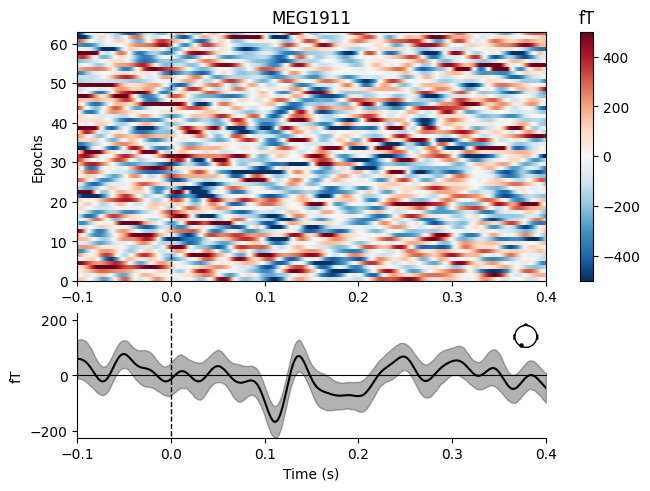

[<Figure size 640x480 with 4 Axes>]

In [6]:
epochs['cue_left'].copy().filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['MEG1911'], vmin=-500, vmax=500)

Applying baseline correction (mode: mean)


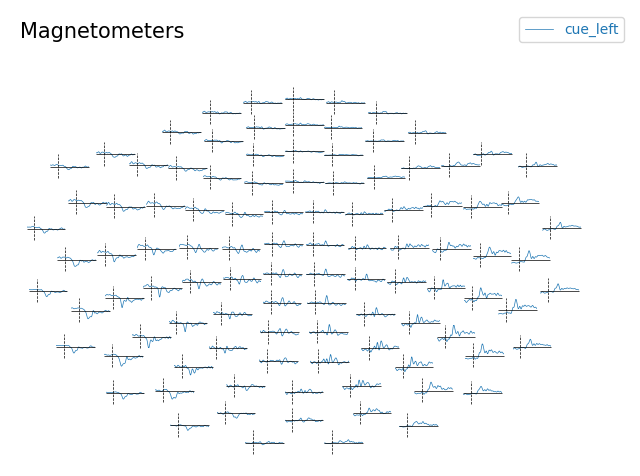

In [7]:
%matplotlib inline
evoked_left.copy().apply_baseline(baseline=(-0.1, 0))
evoked_left.copy().pick('mag').plot_topo(title = 'Magnetometers');

上面显示了每个磁力计上-100到400毫秒的事件相关场。注意后验传感器上约110毫秒的强响应。这通常被称为N100m。

要绘制110毫秒响应的地形图，请编写：

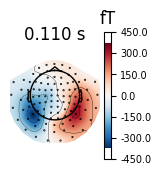

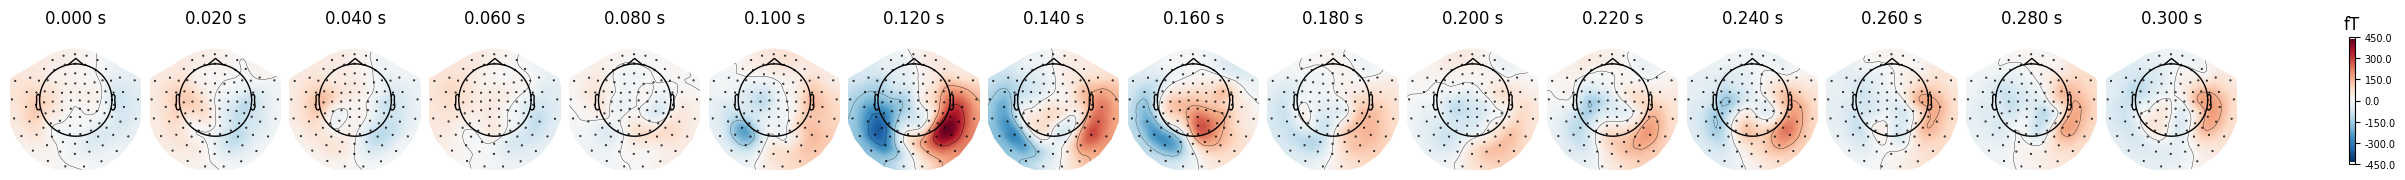

In [8]:
%matplotlib inline
evoked_left.plot_topomap(0.110, ch_type='mag', time_unit='s');
evoked_left.plot_topomap([i / 1000 for i in range(0, 320, 20)], ch_type='mag', time_unit='s'); # 下面问题2的回答

**问题1：** 解释等效电流偶极子如何通过在地形图上绘制后验事件相关场（提示：考虑“右手法则”）

**问题2：** 绘制一系列时间点的地形图，范围从0到300毫秒，步长为20毫秒。


现在我们在每个平面梯度仪上绘制相同的事件相关字段。基线校正是预先应用的。 

Applying baseline correction (mode: mean)


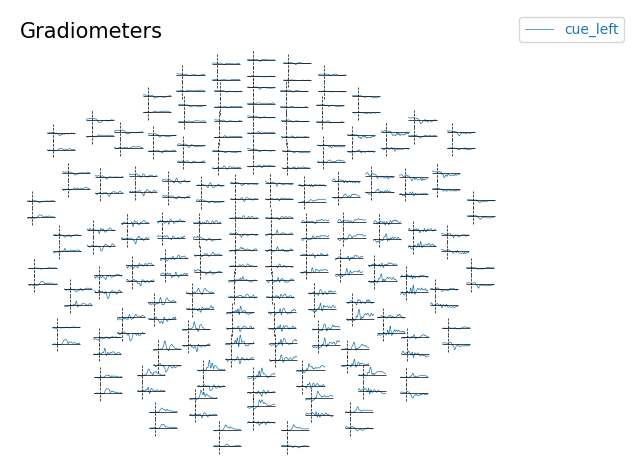

In [9]:
%matplotlib inline
evoked_left.copy().apply_baseline(baseline=(-0.1, 0))
evoked_left.copy().pick('grad').plot_topo(title='Gradiometers');

平面梯度仪成对排列。每对由两个正交的平面传感器（以XXX2和XXX3结尾）组成。解释平面梯度仪的场图并不简单。然而，平面梯度仪的幅值通常在给定电流偶极子正上方最大。

**问题3：** 为什么平面梯度的幅度通常在电流偶极子正上方最强（提示：根据N100m地形图解释）

为了更好地解释平面梯度仪，可以应用均方根运算，将两个正交梯度仪的场大小结合起来：

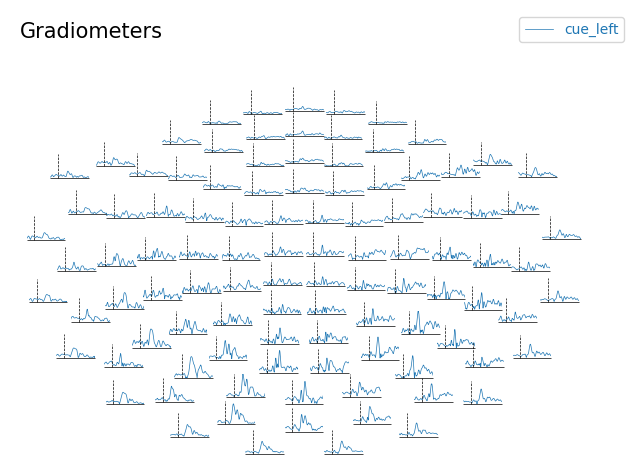

In [13]:
%matplotlib inline
evoked_left.copy().pick('grad').plot_topo(title='Gradiometers', merge_grads=True);
# merge_grads=True：表示将梯度计的不同方向（如 X 和 Y 方向）的数据合并显示。

要在110毫秒绘制组合平面梯度的地形图，请编写：

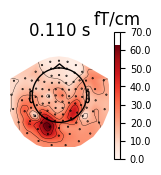

In [14]:
%matplotlib inline
evoked_left.plot_topomap(0.11, ch_type='grad', time_unit='s');

**问题4：** 解释组合平面梯度相对于偶极图的地形（见问题1）。

## Preregistration and publications

Publication, example:

"Prior to calculating the event-related fields, the data were lowpass filtered at 30 Hz (non-causal finite impulse response filter implemented using a Hamming window and a 441 sample filter length). After averaging, a 100 ms baseline was subtracted."

## References 

Woodman G.F. (2010) A brief introduction to the use of event-related potentials in studies of perception and attention. Atten Percept Psychophys. 72(8):2031-46.

Luck, S.J. (2014) An Introduction to the Event-Related Potential Technique, Second Edition. Bradford Books

(many of the recommendation for calculated event-related potentials also apply to calculating event-related fields)
